Task 1:
Web scraping to gain company insights

Importing Libraires

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Web Scraping

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}): 
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


Dataframe Creation

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | After travelling London to ...
1,✅ Trip Verified | My luggage was mis-tagged i...
2,✅ Trip Verified | The airline lost my luggage...
3,✅ Trip Verified | We booked on the BA website...
4,✅ Trip Verified | First time flying with BA b...


In [4]:
df

,reviews
0,✅ Trip Verified | After travelling London to ...
1,✅ Trip Verified | My luggage was mis-tagged i...
2,✅ Trip Verified | The airline lost my luggage...
3,✅ Trip Verified | We booked on the BA website...
4,✅ Trip Verified | First time flying with BA b...
...,...
995,✅ Trip Verified | Philadelphia to London. Nic...
996,✅ Trip Verified | London to Las Vegas I exper...
997,✅ Trip Verified | Zagreb to London and during...
998,✅ Trip Verified | I booked a round trip from ...


In [12]:
df['reviews']=df['reviews'].str.split('|', expand=True)[1]

In [13]:
df

,reviews
0,After travelling London to Madrid with Briti...
1,My luggage was mis-tagged in Dallas on my wa...
2,The airline lost my luggage and was absolute...
3,"We booked on the BA website, round trip flig..."
4,"First time flying with BA business class, ne..."
...,...
995,"Philadelphia to London. Nice plane, nice sea..."
996,London to Las Vegas I experienced an ancient...
997,Zagreb to London and during the check-in (24...
998,I booked a round trip from Milan to Californ...


Data Cleaning

In [14]:
import re

def clean(text):
# Removing all the special characters and numerical values
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,After travelling London to Madrid with Briti...,After travelling London to Madrid with Britis...
1,My luggage was mis-tagged in Dallas on my wa...,My luggage was mis tagged in Dallas on my way...
2,The airline lost my luggage and was absolute...,The airline lost my luggage and was absolutel...
3,"We booked on the BA website, round trip flig...",We booked on the BA website round trip flight...
4,"First time flying with BA business class, ne...",First time flying with BA business class neve...


Natural Language Processing

In [15]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))

    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,After travelling London to Madrid with Briti...,After travelling London to Madrid with Britis...,"[(travelling, v), (London, n), (Madrid, n), (B..."
1,My luggage was mis-tagged in Dallas on my wa...,My luggage was mis tagged in Dallas on my way...,"[(luggage, n), (mis, r), (tagged, v), (Dallas,..."
2,The airline lost my luggage and was absolute...,The airline lost my luggage and was absolutel...,"[(airline, n), (lost, v), (luggage, n), (absol..."
3,"We booked on the BA website, round trip flig...",We booked on the BA website round trip flight...,"[(booked, v), (BA, n), (website, n), (round, n..."
4,"First time flying with BA business class, ne...",First time flying with BA business class neve...,"[(First, a), (time, n), (flying, v), (BA, n), ..."


In [17]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,After travelling London to Madrid with Briti...,After travelling London to Madrid with Britis...,"[(travelling, v), (London, n), (Madrid, n), (B...",travel London Madrid British Airways Iberia ...
1,My luggage was mis-tagged in Dallas on my wa...,My luggage was mis tagged in Dallas on my way...,"[(luggage, n), (mis, r), (tagged, v), (Dallas,...",luggage mis tag Dallas way Cairo via London ...
2,The airline lost my luggage and was absolute...,The airline lost my luggage and was absolutel...,"[(airline, n), (lost, v), (luggage, n), (absol...",airline lose luggage absolutely awful throug...
3,"We booked on the BA website, round trip flig...",We booked on the BA website round trip flight...,"[(booked, v), (BA, n), (website, n), (round, n...",book BA website round trip flight Seattle Am...
4,"First time flying with BA business class, ne...",First time flying with BA business class neve...,"[(First, a), (time, n), (flying, v), (BA, n), ...",First time fly BA business class never board...


In [18]:
df[['reviews','Lemma']]

,reviews,Lemma
0,After travelling London to Madrid with Briti...,travel London Madrid British Airways Iberia ...
1,My luggage was mis-tagged in Dallas on my wa...,luggage mis tag Dallas way Cairo via London ...
2,The airline lost my luggage and was absolute...,airline lose luggage absolutely awful throug...
3,"We booked on the BA website, round trip flig...",book BA website round trip flight Seattle Am...
4,"First time flying with BA business class, ne...",First time fly BA business class never board...
...,...,...
995,"Philadelphia to London. Nice plane, nice sea...",Philadelphia London Nice plane nice seat low...
996,London to Las Vegas I experienced an ancient...,London Las Vegas experience ancient entertai...
997,Zagreb to London and during the check-in (24...,Zagreb London check hour check via app offer...
998,I booked a round trip from Milan to Californ...,book round trip Milan California honeymoon F...


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
    
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,After travelling London to Madrid with Briti...,After travelling London to Madrid with Britis...,"[(travelling, v), (London, n), (Madrid, n), (B...",travel London Madrid British Airways Iberia ...,-0.6486,Negative
1,My luggage was mis-tagged in Dallas on my wa...,My luggage was mis tagged in Dallas on my way...,"[(luggage, n), (mis, r), (tagged, v), (Dallas,...",luggage mis tag Dallas way Cairo via London ...,-0.6124,Negative
2,The airline lost my luggage and was absolute...,The airline lost my luggage and was absolutel...,"[(airline, n), (lost, v), (luggage, n), (absol...",airline lose luggage absolutely awful throug...,-0.8479,Negative
3,"We booked on the BA website, round trip flig...",We booked on the BA website round trip flight...,"[(booked, v), (BA, n), (website, n), (round, n...",book BA website round trip flight Seattle Am...,0.3818,Neutral
4,"First time flying with BA business class, ne...",First time flying with BA business class neve...,"[(First, a), (time, n), (flying, v), (BA, n), ...",First time fly BA business class never board...,-0.5719,Negative


In [21]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    502
Negative    389
Neutral     109
Name: count, dtype: int64

In [24]:
type(vader_counts)

pandas.core.series.Series

Data Visualization

([<matplotlib.patches.Wedge at 0x221d5095e50>,
 [Text(-0.006911369381001344, 1.0999782875008395, 'Positive'),
  Text(-0.3628411290168043, -1.0384345502215395, 'Negative'),
  Text(1.2716193248090064, -0.4533037533181108, 'Neutral')],
 [Text(-0.003769837844182551, 0.5999881568186396, '50.2%'),
  Text(-0.19791334310007505, -0.5664188455753851, '38.9%'),
  Text(0.8006492045093745, -0.28541347431140307, '10.9%')])

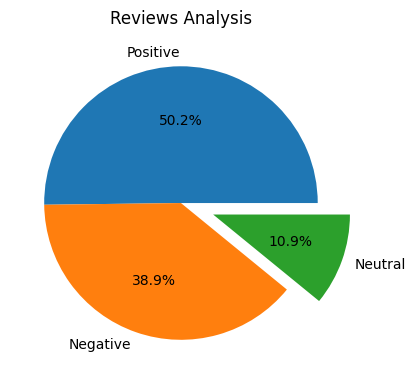

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

Data Storing

In [23]:
df.to_csv("Preprocessed British Airways reviews.csv")

Data Visualization

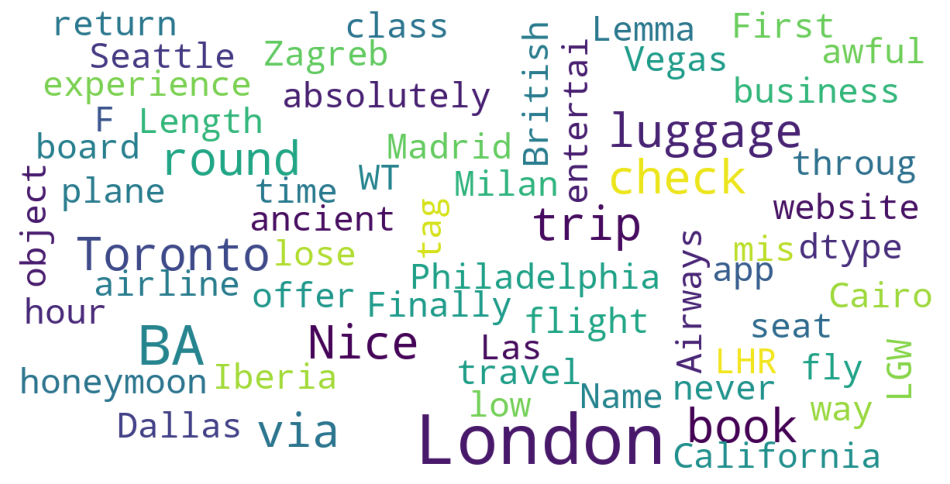

In [28]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

Background Knowledge

Importing Libraries




Importing Requests: To import data from a url.

Importing Beautifulsoup4: Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

Importing Pandas: It is used to create a dataframe from the scrapped data, and used as a framework for cleaning, analyzing, and visualizing of data.



Natural Language Processing




Tokenization: Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Enrichment - POS tagging: Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

Stopwords removal: Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

Stem Words: A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.
